<a href="https://colab.research.google.com/github/MustafaGhaziTalab/MustafaGhaziTalab/blob/main/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
import pandas as pd
import zipfile
import io
import os

def upload_and_extract(zip_file_name):
    with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
        zip_ref.extractall()
        print(f"Files in the current directory after extracting {zip_file_name}:")
        print(os.listdir('.'))

def upload_and_load_data():
    # Upload file from the user's system
    uploaded = files.upload()
    zip_file_name = list(uploaded.keys())[0]  # This should be 'bank+marketing.zip'

    # Extract the main zip file
    upload_and_extract(io.BytesIO(uploaded[zip_file_name]))

    # Now, extract the nested 'bank-additional.zip' if it exists
    if 'bank-additional.zip' in os.listdir('.'):
        upload_and_extract('bank-additional.zip')

    # The path for the CSV file within the 'bank-additional' directory
    data_file = 'bank-additional/bank-additional-full.csv'

    # Read the data into a pandas DataFrame
    try:
        data = pd.read_csv(data_file, sep=';')  # Adjust separator if necessary
        return data
    except FileNotFoundError as e:
        print(f"File not found: {data_file}")
        print(f"Error: {e}")
        return None

# Main execution flow
if __name__ == "__main__":
    data = upload_and_load_data()
    if data is not None:
        # Display the first few rows of the DataFrame
        print(data.head())


Saving bank+marketing.zip to bank+marketing.zip
Files in the current directory after extracting <_io.BytesIO object at 0x7a3bfbfa9a30>:
['.config', 'bank+marketing.zip', 'bank-additional.zip', 'bank.zip', 'sample_data']
Files in the current directory after extracting bank-additional.zip:
['.config', 'bank-additional', '__MACOSX', 'bank+marketing.zip', 'bank-additional.zip', 'bank.zip', 'sample_data']
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonex

In [2]:
# bank_marketing_data_cleaning.py
import pandas as pd
import numpy as np
import os

# Ensure the current working directory is where 'bank-additional' is located
os.chdir('/content/bank-additional')  # Adjust the path to the 'bank-additional' directory if necessary

# List files in the 'bank-additional' directory for verification
print("Files in 'bank-additional' directory:", os.listdir('.'))

# Load the dataset
data_file = 'bank-additional-full.csv'
try:
    df = pd.read_csv(data_file, sep=';')
    print(df.head())  # Display the first few rows of the DataFrame
except FileNotFoundError as e:
    print(f"Error: {e}")

# The rest of your code for data cleaning would follow here
# ...


Files in 'bank-additional' directory: ['bank-additional-names.txt', '.Rhistory', 'bank-additional-full.csv', '.DS_Store', 'bank-additional.csv']
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          

               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198    

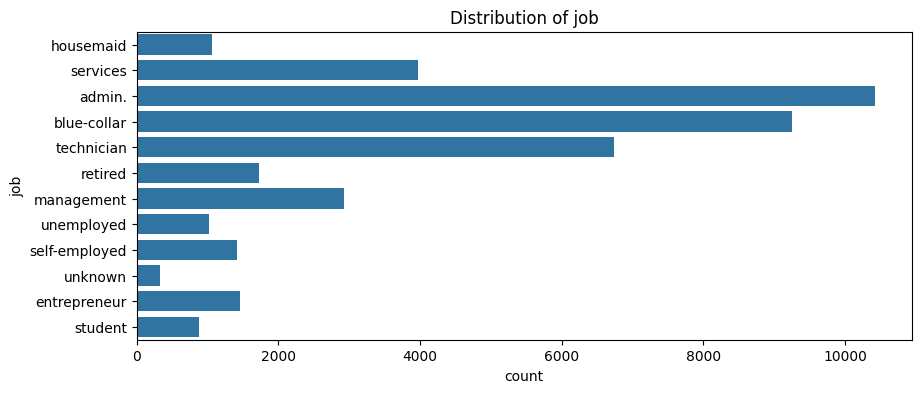

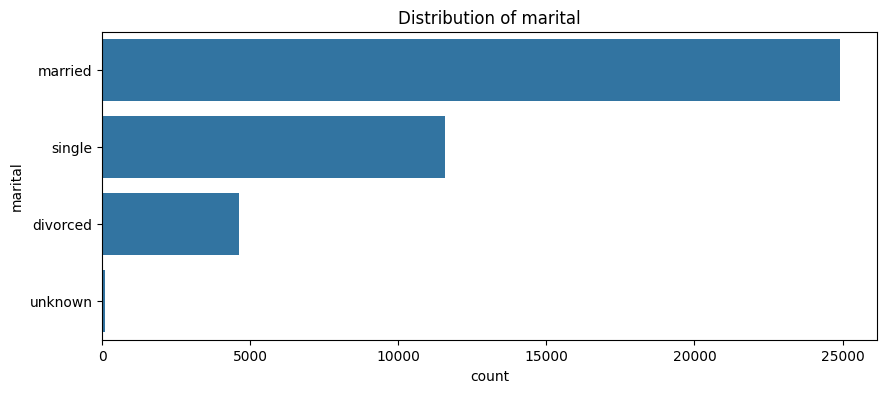

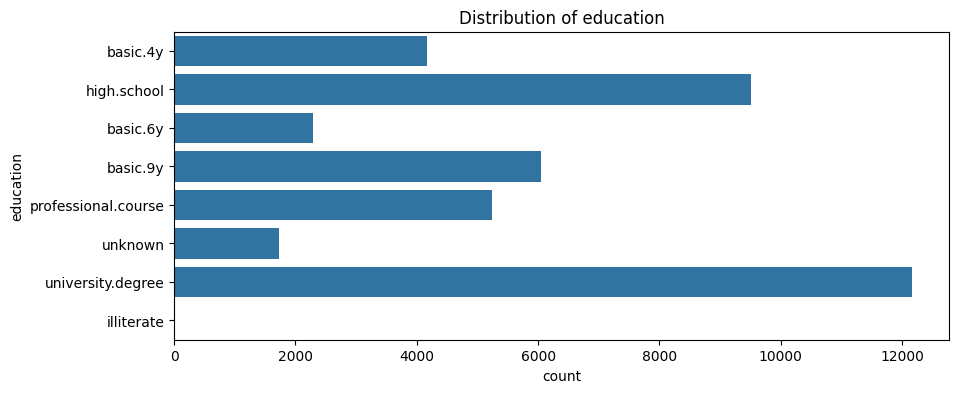

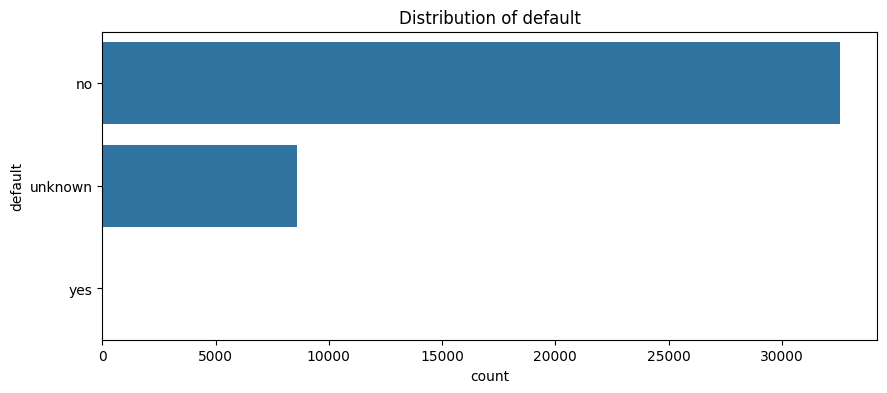

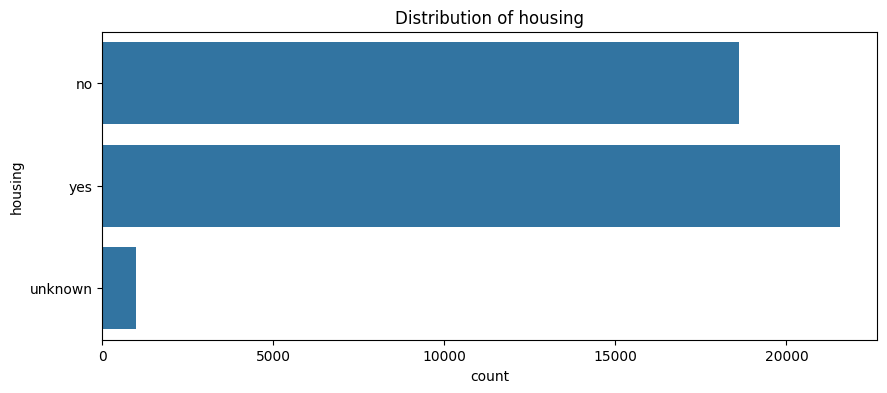

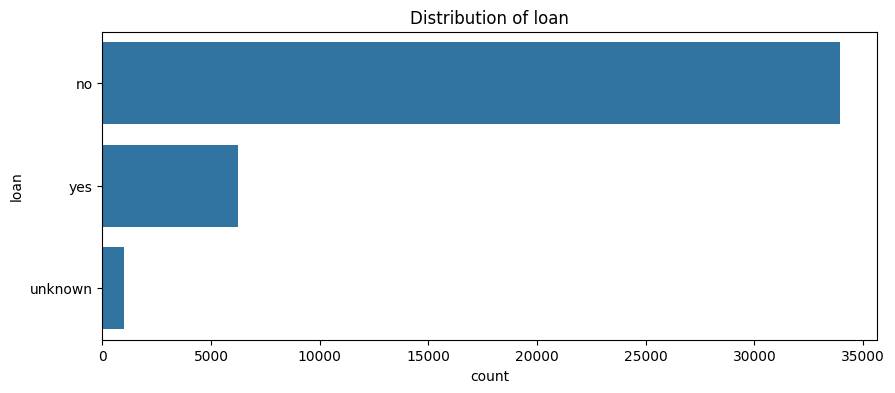

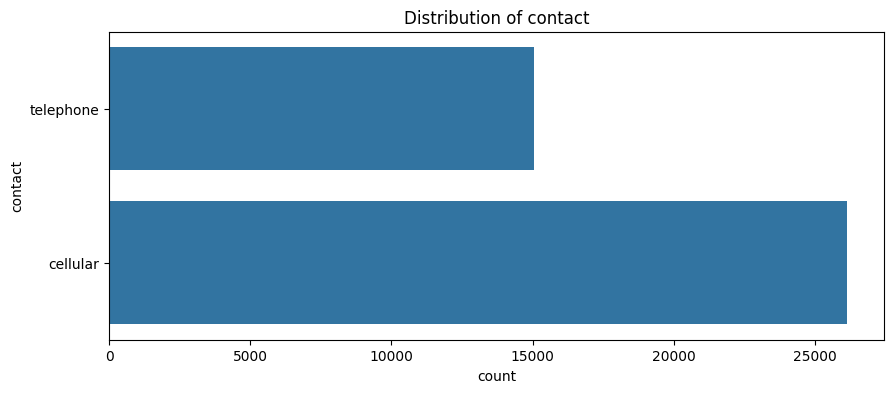

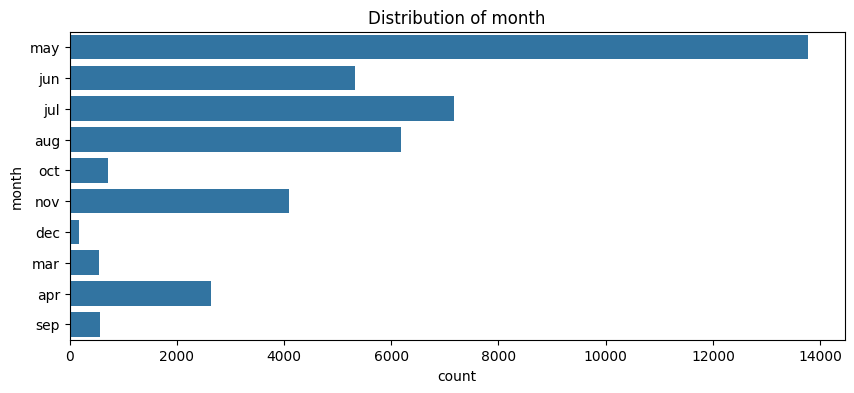

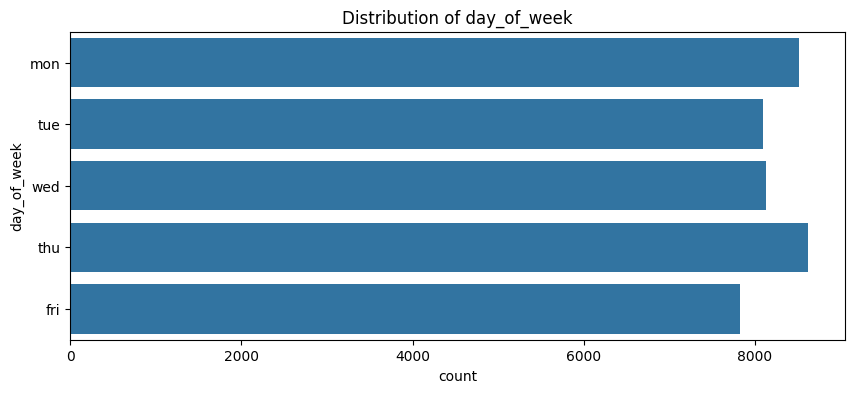

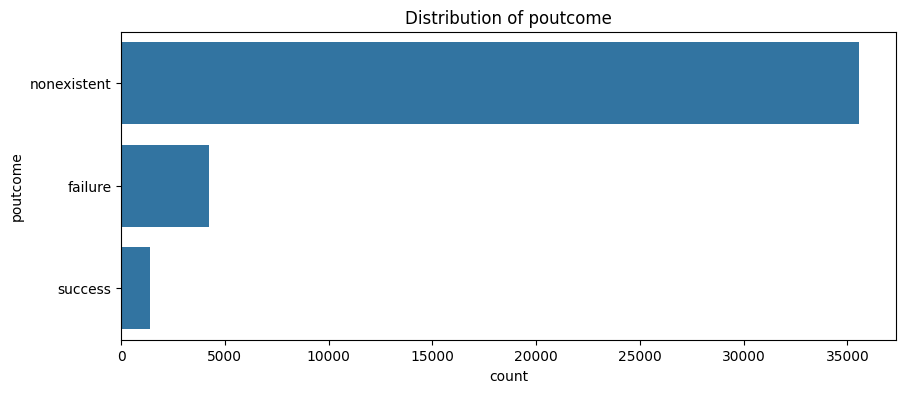

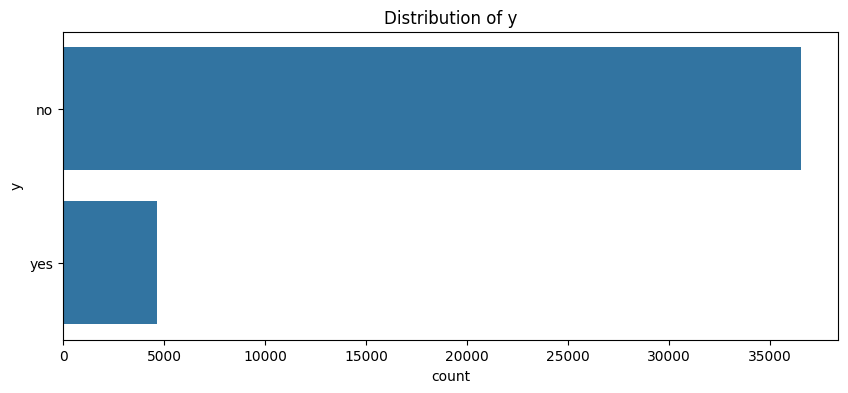

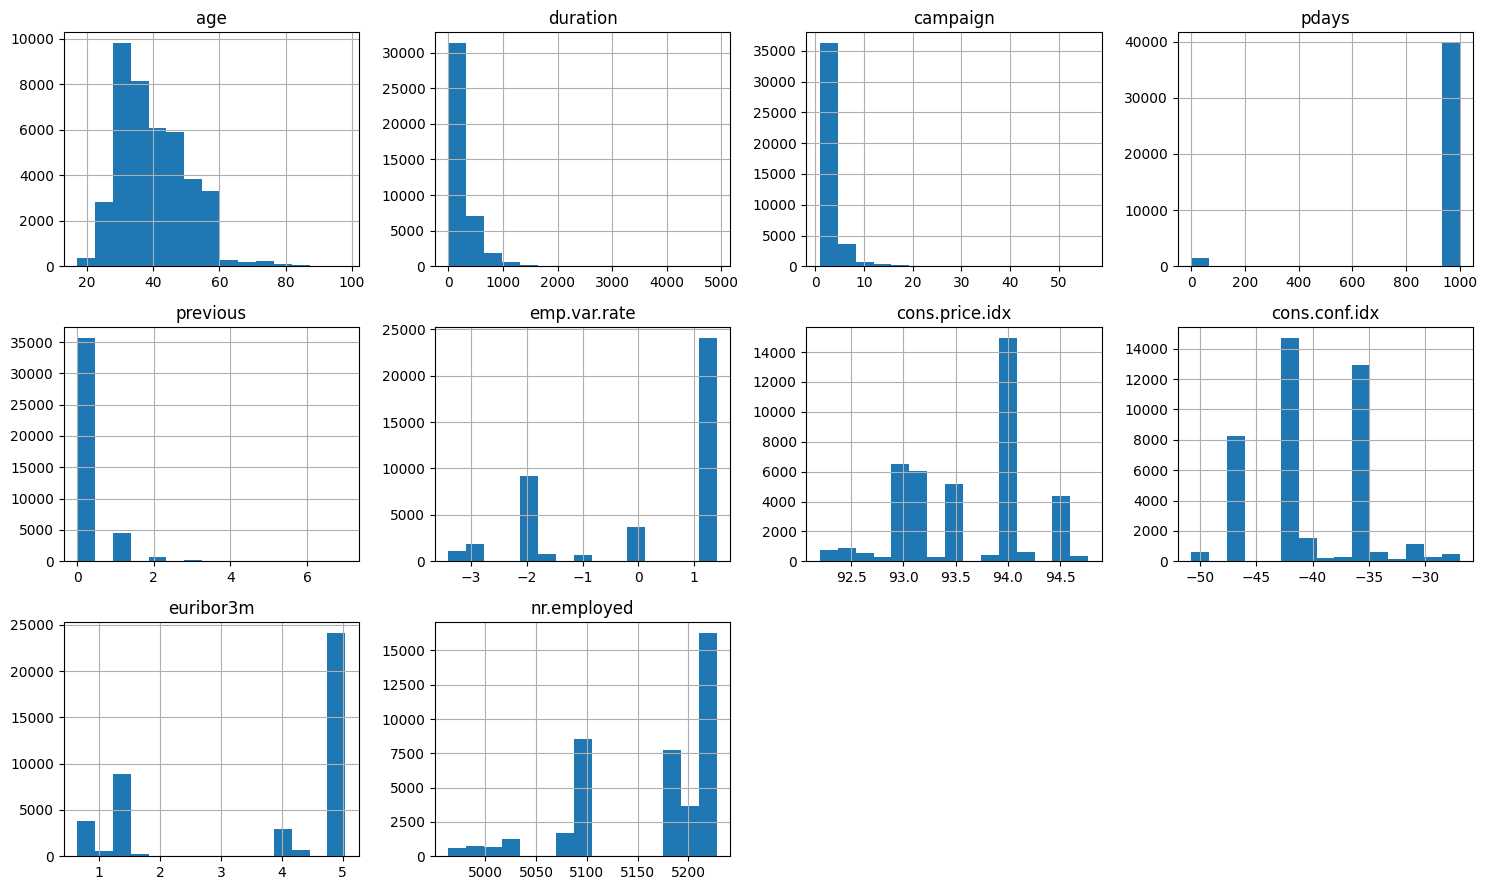

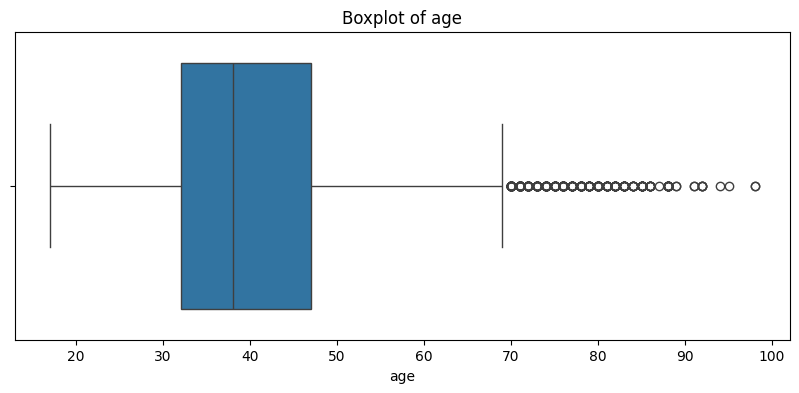

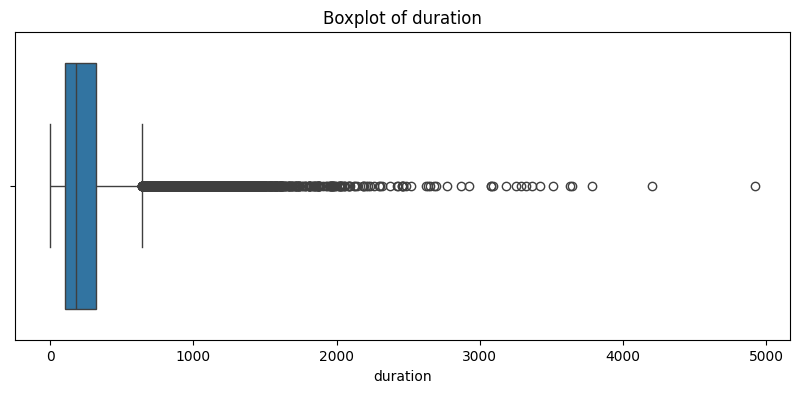

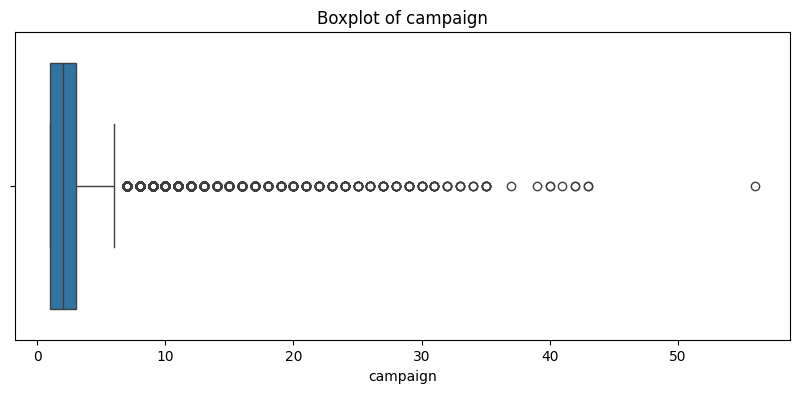

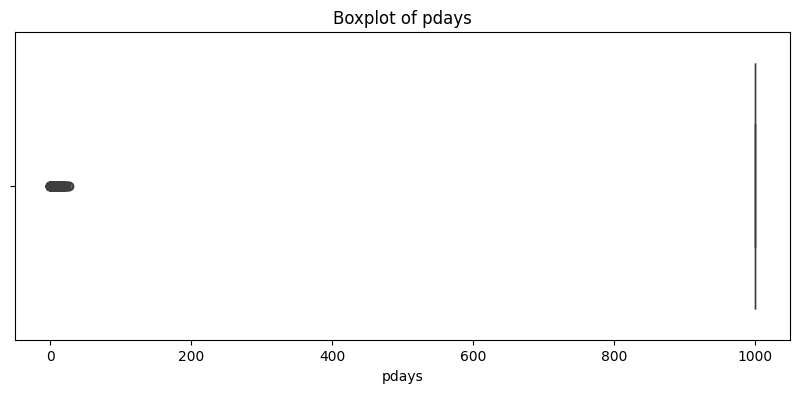

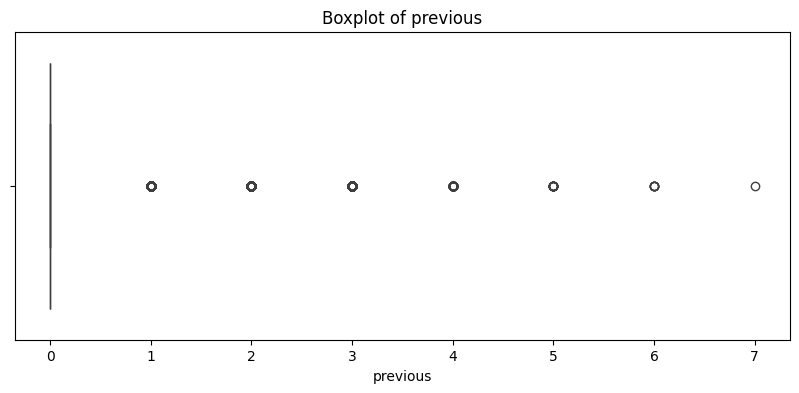

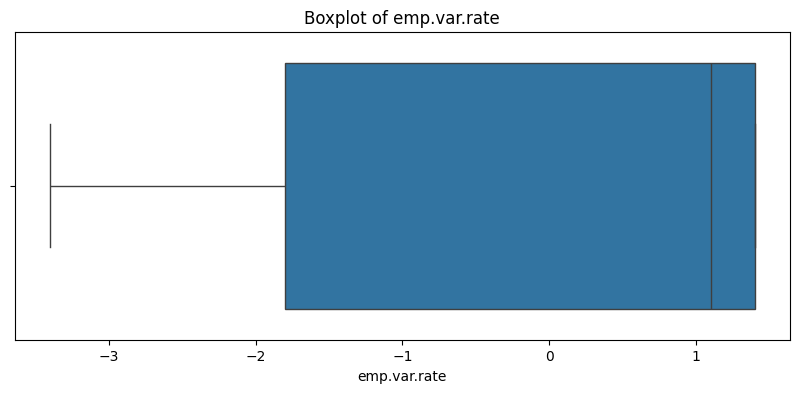

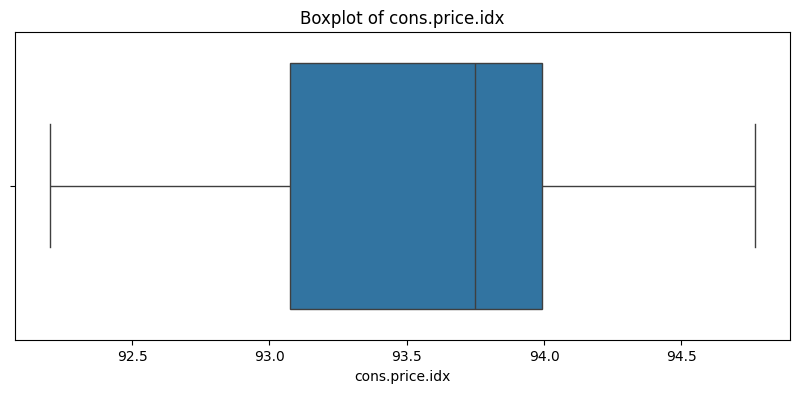

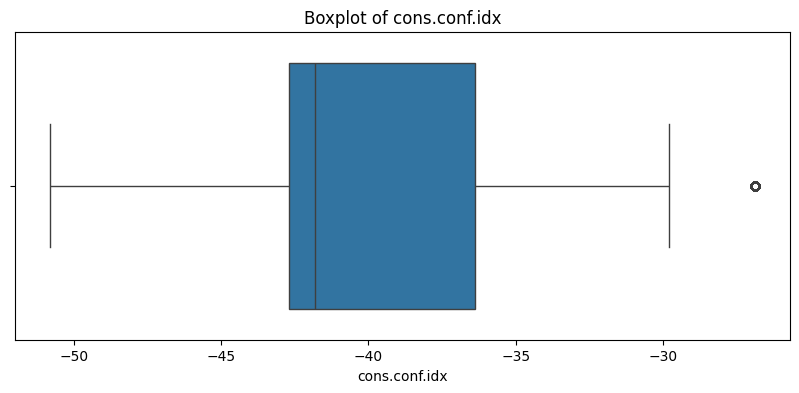

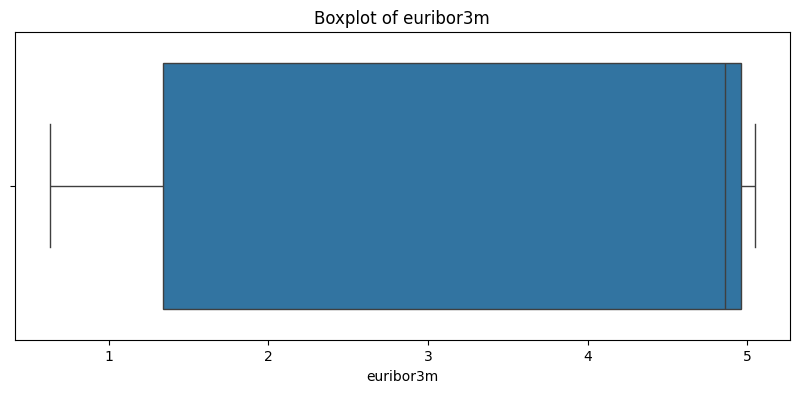

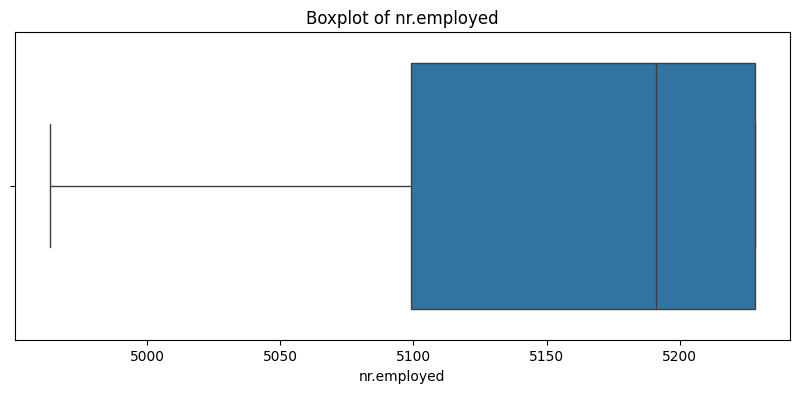

<ipython-input-3-1f99ffb2bb3b>:43: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


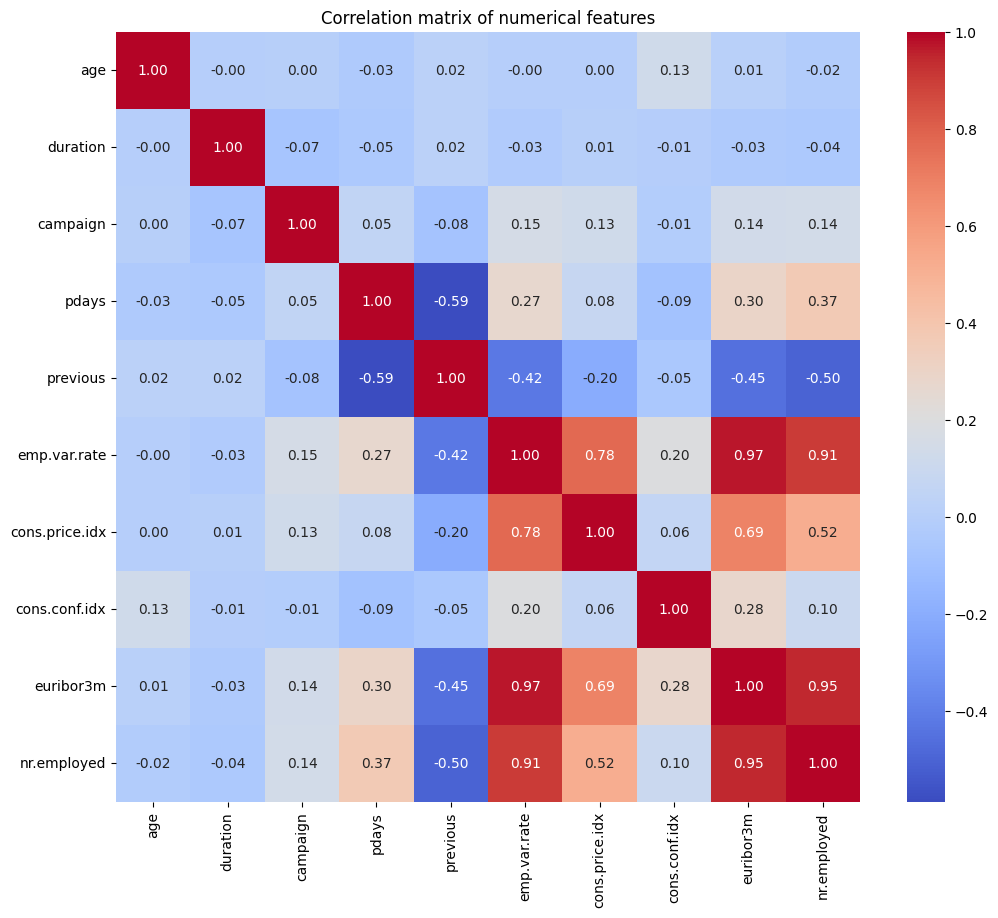

In [3]:
# bank_marketing_eda.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is the DataFrame containing the bank marketing data
# If running in a new context, uncomment the next lines to load the dataset
# data_file = '/content/bank-additional/bank-additional-full.csv'
# df = pd.read_csv(data_file, sep=';')

# Summary statistics for numerical features
print(df.describe())

# Count plots for categorical features to understand the distribution
categorical_features = df.select_dtypes(include=['object', 'category']).columns
for feature in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(y=feature, data=df)
    plt.title(f'Distribution of {feature}')
    plt.show()

# Determine the number of rows needed for the histogram subplots
numerical_features = df.select_dtypes(include=[np.number]).columns
n_features = len(numerical_features)
n_cols = 4
n_rows = n_features // n_cols + (n_features % n_cols > 0)

# Histograms for numerical features to understand their distributions
df[numerical_features].hist(bins=15, figsize=(15, n_rows*3), layout=(n_rows, n_cols))
plt.tight_layout()
plt.show()

# Boxplots for numerical features to identify outliers
for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=feature, data=df)
    plt.title(f'Boxplot of {feature}')
    plt.show()

# Correlation matrix heatmap to find potential correlations
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation matrix of numerical features')
plt.show()

# Save the path to the dataset for future use
dataset_path = '/content/bank-additional/bank-additional-full.csv'


In [4]:
# bank_marketing_preprocessing.py
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Assuming df is the DataFrame containing the bank marketing data

# Select categorical data and apply OneHotEncoding
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns
onehotencoder = OneHotEncoder(drop='first')  # drop='first' to avoid dummy variable trap
encoded_features = onehotencoder.fit_transform(df[categorical_cols]).toarray()
encoded_features_names = onehotencoder.get_feature_names_out(categorical_cols)
encoded_df = pd.DataFrame(encoded_features, columns=encoded_features_names)

# Scale numerical features
numerical_cols = df.select_dtypes(include=[np.number]).columns
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[numerical_cols])
scaled_df = pd.DataFrame(scaled_features, columns=numerical_cols)

# Combine encoded and scaled features
processed_df = pd.concat([scaled_df, encoded_df], axis=1)

# Encode the target variable
df['y_encoded'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

# Split the data into training and testing sets
X = processed_df
y = df['y_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now, X_train, X_test, y_train, and y_test are ready for model training and evaluation.


In [5]:
# bank_marketing_preprocessing.py
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Assuming df is the DataFrame containing the bank marketing data
# ...

# Encoding categorical variables using OneHotEncoder
# ...

# Print the first few rows of the encoded categorical features
print("Encoded categorical features:")
print(encoded_df.head())

# Scale numerical features using StandardScaler
# ...

# Print the first few rows of the scaled numerical features
print("Scaled numerical features:")
print(scaled_df.head())

# Combine encoded categorical and scaled numerical features
# ...

# Print the first few rows of the processed DataFrame
print("Processed DataFrame:")
print(processed_df.head())

# Encode the target variable
# ...

# Print the encoded target variable
print("Encoded target variable:")
print(y.head())

# Split the data into training and testing sets
# ...

# Print the shapes of the train and test sets
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

# The print statements will display the results of each preprocessing step.


Encoded categorical features:
   job_blue-collar  job_entrepreneur  job_housemaid  job_management  \
0              0.0               0.0            1.0             0.0   
1              0.0               0.0            0.0             0.0   
2              0.0               0.0            0.0             0.0   
3              0.0               0.0            0.0             0.0   
4              0.0               0.0            0.0             0.0   

   job_retired  job_self-employed  job_services  job_student  job_technician  \
0          0.0                0.0           0.0          0.0             0.0   
1          0.0                0.0           1.0          0.0             0.0   
2          0.0                0.0           1.0          0.0             0.0   
3          0.0                0.0           0.0          0.0             0.0   
4          0.0                0.0           1.0          0.0             0.0   

   job_unemployed  ...  month_nov  month_oct  month_sep  day_o

In [6]:
# bank_marketing_model_training.py
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Assuming X_train, X_test, y_train, and y_test are already defined

# Initialize the Logistic Regression model
logistic_model = LogisticRegression()

# Train the model
logistic_model.fit(X_train, y_train)

# Predict on the test set
y_pred = logistic_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy of the Logistic Regression model: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# If you want to improve model performance, consider hyperparameter tuning here


Accuracy of the Logistic Regression model: 1.00
Confusion Matrix:
[[7303    0]
 [   0  935]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7303
           1       1.00      1.00      1.00       935

    accuracy                           1.00      8238
   macro avg       1.00      1.00      1.00      8238
weighted avg       1.00      1.00      1.00      8238



In [7]:
# bank_marketing_cross_validation.py
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(logistic_model, X_train, y_train, cv=5, scoring='accuracy')

print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean():.2f}")


Cross-validation accuracy scores: [1.         1.         0.99984825 1.         1.        ]
Mean CV accuracy: 1.00


In [8]:
# Check the balance of the target variable
print("Target variable distribution:")
print(df['y'].value_counts())

# Check for constant features
print("\nFeatures with low variance (possible constants):")
for column in X_train.columns:
    if X_train[column].nunique() == 1:
        print(column)

# Verify that there are no identical rows
print("\nNumber of duplicated entries:", df.duplicated().sum())


Target variable distribution:
no     36548
yes     4640
Name: y, dtype: int64

Features with low variance (possible constants):

Number of duplicated entries: 12


In [9]:
from sklearn.dummy import DummyClassifier

# Create a dummy classifier
dummy_clf = DummyClassifier(strategy='most_frequent')

# Train the dummy classifier
dummy_clf.fit(X_train, y_train)

# Evaluate the dummy classifier
dummy_pred = dummy_clf.predict(X_test)
dummy_accuracy = accuracy_score(y_test, dummy_pred)

print(f"Dummy Classifier Accuracy: {dummy_accuracy:.2f}")


Dummy Classifier Accuracy: 0.89


In [10]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
decision_tree_model = DecisionTreeClassifier()

# Train the model
decision_tree_model.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = decision_tree_model.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
class_report_dt = classification_report(y_test, y_pred_dt)

print(f"Accuracy of the Decision Tree model: {accuracy_dt:.2f}")
print("Confusion Matrix:")
print(conf_matrix_dt)
print("Classification Report:")
print(class_report_dt)


Accuracy of the Decision Tree model: 1.00
Confusion Matrix:
[[7303    0]
 [   0  935]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7303
           1       1.00      1.00      1.00       935

    accuracy                           1.00      8238
   macro avg       1.00      1.00      1.00      8238
weighted avg       1.00      1.00      1.00      8238



In [11]:
from sklearn.utils import shuffle

# Shuffle the labels
y_shuffled = shuffle(y, random_state=42)

# Split the data with the shuffled labels
X_train_sh, X_test_sh, y_train_sh, y_test_sh = train_test_split(X, y_shuffled, test_size=0.2, random_state=42)

# Retrain the Logistic Regression model with shuffled labels
logistic_model.fit(X_train_sh, y_train_sh)
y_pred_sh = logistic_model.predict(X_test_sh)
accuracy_sh = accuracy_score(y_test_sh, y_pred_sh)
print(f"Shuffled Logistic Regression Accuracy: {accuracy_sh}")

# Retrain the Decision Tree model with shuffled labels
decision_tree_model.fit(X_train_sh, y_train_sh)
y_pred_dt_sh = decision_tree_model.predict(X_test_sh)
accuracy_dt_sh = accuracy_score(y_test_sh, y_pred_dt_sh)
print(f"Shuffled Decision Tree Accuracy: {accuracy_dt_sh}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Shuffled Logistic Regression Accuracy: 0.8877154649186696
Shuffled Decision Tree Accuracy: 0.7899975722262685


In [12]:
# Increase max_iter for Logistic Regression
logistic_model = LogisticRegression(max_iter=1000)

# Retrain with original labels
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Updated Logistic Regression Accuracy: {accuracy}")


Updated Logistic Regression Accuracy: 1.0


Random Forest Classifier Accuracy: 1.0


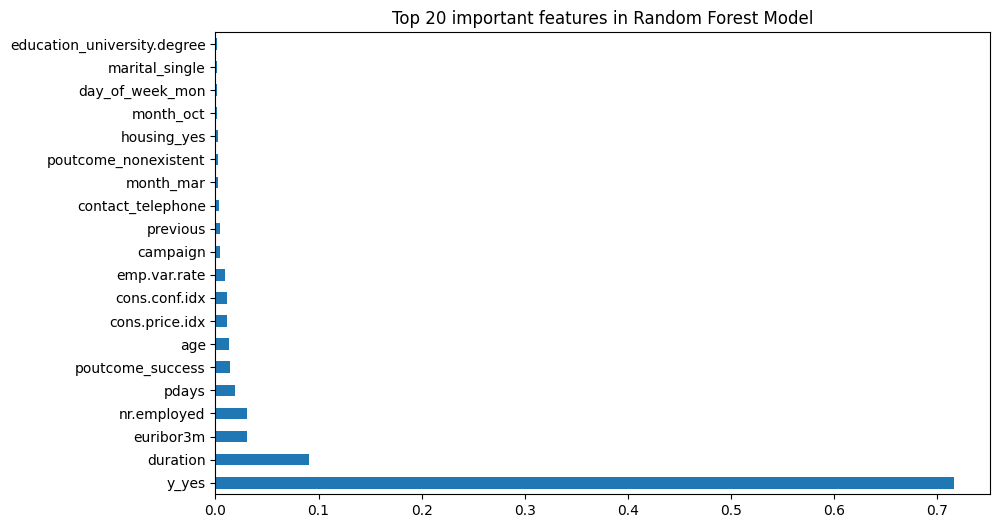

In [13]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
random_forest_model = RandomForestClassifier()

# Train the model
random_forest_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Classifier Accuracy: {accuracy_rf}")

# Feature Importance Analysis
importances = random_forest_model.feature_importances_
feature_names = X_train.columns
forest_importances = pd.Series(importances, index=feature_names)

# Plotting feature importances
plt.figure(figsize=(10, 6))
forest_importances.sort_values(ascending=False).head(20).plot(kind='barh')
plt.title("Top 20 important features in Random Forest Model")
plt.show()


In [14]:
# Print the columns in X_train and X_test before attempting to drop
print("Columns in X_train:", X_train.columns.tolist())
print("Columns in X_test:", X_test.columns.tolist())

# Check and drop 'y_yes' and 'y_encoded' from the feature set if they exist
columns_to_drop = ['y_yes', 'y_encoded']
X_train_revised = X_train.drop(columns=[col for col in columns_to_drop if col in X_train.columns], errors='ignore')
X_test_revised = X_test.drop(columns=[col for col in columns_to_drop if col in X_test.columns], errors='ignore')

# Continue with the model training and evaluation as before
# ...


Columns in X_train: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_married', 'marital_single', 'marital_unknown', 'education_basic.6y', 'education_basic.9y', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'education_unknown', 'default_unknown', 'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown', 'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success', 'y_yes']
Columns in X_test: ['age', 'duration', 'campaign', 'pdays',

Columns in X_train: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_married', 'marital_single', 'marital_unknown', 'education_basic.6y', 'education_basic.9y', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'education_unknown', 'default_unknown', 'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown', 'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success', 'y_yes']
Columns in X_test: ['age', 'duration', 'campaign', 'pdays',

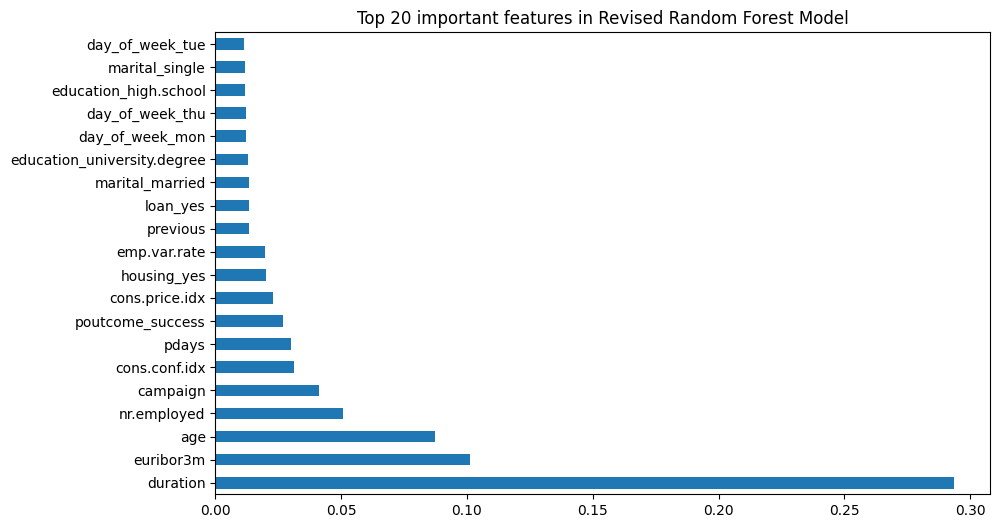

In [15]:

# Print the columns in X_train and X_test before attempting to drop
print("Columns in X_train:", X_train.columns.tolist())
print("Columns in X_test:", X_test.columns.tolist())

# Check and drop 'y_yes' and 'y_encoded' from the feature set if they exist
columns_to_drop = ['y_yes', 'y_encoded']
X_train_revised = X_train.drop(columns=[col for col in columns_to_drop if col in X_train.columns], errors='ignore')
X_test_revised = X_test.drop(columns=[col for col in columns_to_drop if col in X_test.columns], errors='ignore')

# Continue with the model training and evaluation as before
# ...

# First, let's ensure that 'y_yes' and 'y_encoded' columns are present before trying to drop them
columns_to_drop = ['y_yes', 'y_encoded']
X_train_revised = X_train.drop(columns=[col for col in columns_to_drop if col in X_train.columns], errors='ignore')
X_test_revised = X_test.drop(columns=[col for col in columns_to_drop if col in X_test.columns], errors='ignore')

# Now we can initialize the Random Forest model
random_forest_model_revised = RandomForestClassifier()

# Train the model with the revised feature set
random_forest_model_revised.fit(X_train_revised, y_train)

# Predict on the test set with the revised feature set
y_pred_rf_revised = random_forest_model_revised.predict(X_test_revised)

# Evaluate the revised model
from sklearn.metrics import accuracy_score
accuracy_rf_revised = accuracy_score(y_test, y_pred_rf_revised)
print(f"Revised Random Forest Classifier Accuracy: {accuracy_rf_revised}")

# Feature Importance Analysis without the 'y_yes' and 'y_encoded' features
importances_revised = random_forest_model_revised.feature_importances_
feature_names_revised = X_train_revised.columns
forest_importances_revised = pd.Series(importances_revised, index=feature_names_revised)

# Ensure matplotlib is imported for plotting
import matplotlib.pyplot as plt

# Plotting revised feature importances
plt.figure(figsize=(10, 6))
forest_importances_revised.sort_values(ascending=False).head(20).plot(kind='barh')
plt.title("Top 20 important features in Revised Random Forest Model")
plt.show()



In [16]:
from sklearn.model_selection import GridSearchCV

# Set up the parameter grid to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 6, 8, 10],
    'criterion': ['gini', 'entropy']
}

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train_revised, y_train)

# Print the best parameters and the best score
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best score from Grid Search: {grid_search.best_score_}")

# Predict on the test set using the best found parameters
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test_revised)

# Evaluate the best model from grid search
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
print(f"Accuracy of the best Random Forest model from Grid Search: {accuracy_best_rf}")


Fitting 5 folds for each of 72 candidates, totalling 360 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best parameters found: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 300}
Best score from Grid Search: 0.9111987860394537
Accuracy of the best Random Forest model from Grid Search: 0.9068948773974266


In [17]:
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score

# Additional evaluation metrics
f1 = f1_score(y_test, y_pred_best_rf)
precision = precision_score(y_test, y_pred_best_rf)
recall = recall_score(y_test, y_pred_best_rf)
roc_auc = roc_auc_score(y_test, y_pred_best_rf)
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"ROC AUC Score: {roc_auc}")


F1 Score: 0.4271844660194175
Precision: 0.7079207920792079
Recall: 0.3058823529411765
ROC AUC Score: 0.6448623047740252


In [18]:
# Adjust class weights in the Random Forest model
rf_weighted = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    max_features='sqrt',  # Address the deprecation warning
    criterion='gini',
    class_weight='balanced',  # Adjust class weights
    random_state=42
)

# Train the model with class weights
rf_weighted.fit(X_train_revised, y_train)

# Predict on the test set with the weighted model
y_pred_rf_weighted = rf_weighted.predict(X_test_revised)

# Evaluate the weighted model
accuracy_rf_weighted = accuracy_score(y_test, y_pred_rf_weighted)
f1_weighted = f1_score(y_test, y_pred_rf_weighted)
precision_weighted = precision_score(y_test, y_pred_rf_weighted)
recall_weighted = recall_score(y_test, y_pred_rf_weighted)
roc_auc_weighted = roc_auc_score(y_test, y_pred_rf_weighted)

print(f"Weighted Random Forest Classifier Accuracy: {accuracy_rf_weighted}")
print(f"Weighted F1 Score: {f1_weighted}")
print(f"Weighted Precision: {precision_weighted}")
print(f"Weighted Recall: {recall_weighted}")
print(f"Weighted ROC AUC Score: {roc_auc_weighted}")


Weighted Random Forest Classifier Accuracy: 0.8595532896334062
Weighted F1 Score: 0.593607305936073
Weighted Precision: 0.4419456066945607
Weighted Recall: 0.9037433155080213
Weighted ROC AUC Score: 0.8788194874130549


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define a new parameter grid, perhaps with a narrower focus based on previous results
param_grid = {
    'n_estimators': [200, 300, 400],
    'max_depth': [8, 10, 12],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3],
    'class_weight': ['balanced', 'balanced_subsample']
}

# Create a new RandomForestClassifier instance
rf_classifier = RandomForestClassifier(random_state=42)

# Create a new GridSearchCV instance
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train_revised, y_train)

# Print the best parameters and the best score from the grid search
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best F1 score from Grid Search: {grid_search.best_score_}")

# Evaluate the model with the best parameters
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test_revised)
f1_best_rf = f1_score(y_test, y_pred_best_rf)

print(f"Best Random Forest F1 Score: {f1_best_rf}")


Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best parameters: {'class_weight': 'balanced_subsample', 'max_depth': 12, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 200}
Best F1 score from Grid Search: 0.6227630616845965
Best Random Forest F1 Score: 0.6065273193986065


In [20]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cross_val_scores = cross_val_score(best_rf, X_train_revised, y_train, cv=skf, scoring='f1')

print(f"Stratified Cross-Validation F1 Scores: {cross_val_scores}")
print(f"Mean F1 Score: {cross_val_scores.mean()}")
print(f"Standard Deviation of F1 Scores: {cross_val_scores.std()}")


Stratified Cross-Validation F1 Scores: [0.61144718 0.60869565 0.62065637 0.63829787 0.61699098]
Mean F1 Score: 0.6192176124694567
Standard Deviation of F1 Scores: 0.01041321678214235


In [21]:
!pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 7.6 MB/s eta 0:00:00


In [22]:
# Assuming that grid_search has already been fitted as shown earlier
best_rf = grid_search.best_estimator_


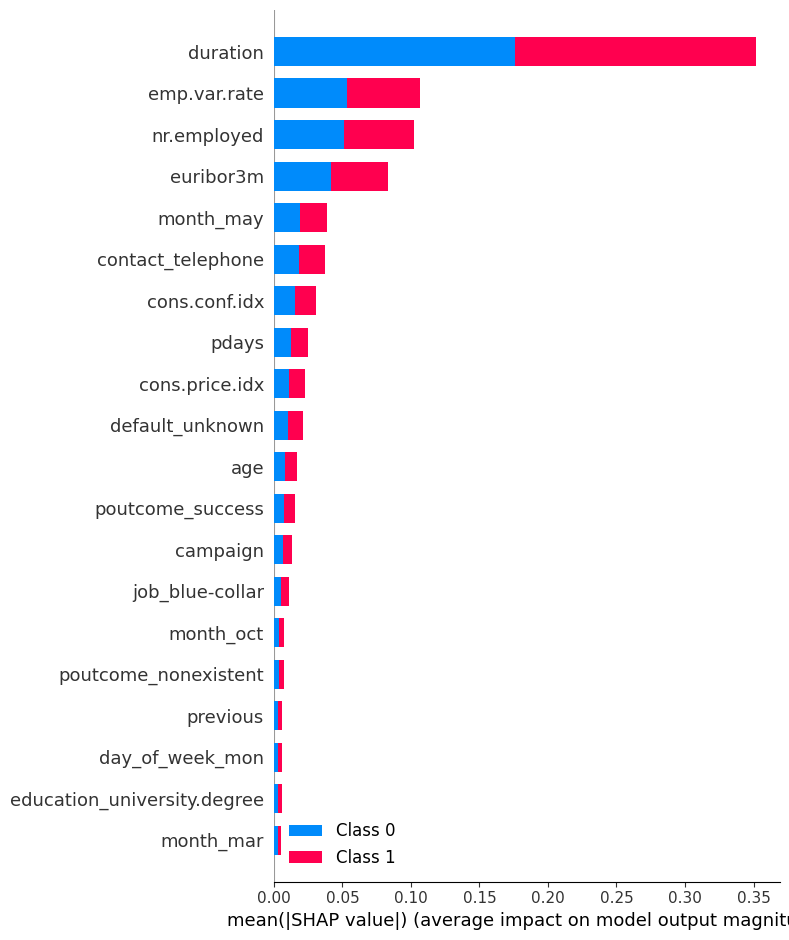

In [23]:
import shap

# Initialize the SHAP Explainer
explainer = shap.TreeExplainer(best_rf)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test_revised)

# Summarize the effects of all the features
shap.summary_plot(shap_values, X_test_revised, plot_type="bar")

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer, f1_score

# Assuming X_train, X_test, y_train, y_test are already defined and preprocessed

# Oversampling using SMOTE
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Feature selection using RFECV
rfecv = RFECV(estimator=RandomForestClassifier(), step=1, cv=StratifiedKFold(5), scoring='f1')
X_train_selected = rfecv.fit_transform(X_train_resampled, y_train_resampled)

# Hyperparameter tuning using RandomizedSearchCV
param_distributions = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
random_search = RandomizedSearchCV(RandomForestClassifier(), param_distributions, n_iter=100, cv=5, scoring=make_scorer(f1_score), random_state=42)
random_search.fit(X_train_selected, y_train_resampled)

# Best model after RandomizedSearchCV
best_rf = random_search.best_estimator_

# Fit the model on selected features
best_rf.fit(X_train_selected, y_train_resampled)

# Transform the test set features
X_test_selected = rfecv.transform(X_test)

# Predict and evaluate the model
y_pred = best_rf.predict(X_test_selected)
print(f"Improved Random Forest F1 Score: {f1_score(y_test, y_pred)}")


Improved Random Forest F1 Score: 1.0


In [25]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(best_rf, X_train_selected, y_train_resampled, cv=5, scoring='f1')

print("Cross-Validation F1 Scores:", cv_scores)
print("Mean CV F1 Score:", cv_scores.mean())
print("Standard Deviation of CV F1 Scores:", cv_scores.std())


Cross-Validation F1 Scores: [1. 1. 1. 1. 1.]
Mean CV F1 Score: 1.0
Standard Deviation of CV F1 Scores: 0.0
